In [1]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [2]:
!pip install librosa

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename='/Users/shivaan/Desktop/98859-7-2-5.wav'

In [5]:
import IPython.display as ipd
import librosa
import librosa.display

In [6]:
!pip install --upgrade librosa


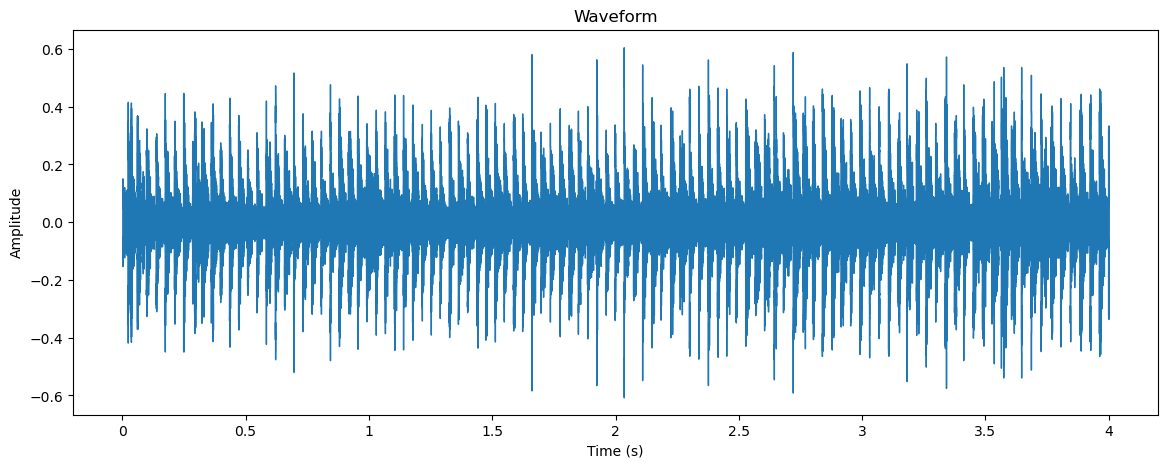

In [7]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd



# Load the audio file
data, sample_rate = librosa.load(filename)

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

# Play the audio
ipd.Audio(filename)


In [8]:
# ### Sound
# filename='UrbanSound8K/100263-2-0-3.wav'
# plt.figure(figsize=(14,5))
# data,sample_rate=librosa.load(filename)
# librosa.display.waveshow(data,sr=sample_rate)
# ipd.Audio(filename)

In [9]:
sample_rate


22050

In [10]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [11]:
wave_sample_rate

44100

In [12]:
wave_audio

array([[ 1394,  1520],
       [ 3899, -1223],
       [ 5903, -1959],
       ...,
       [ -745, -2453],
       [-2529, -6471],
       [-4692, -9085]], dtype=int16)

In [13]:
data

array([ 0.02322372,  0.07336561,  0.08497217, ...,  0.09337843,
        0.01794307, -0.17792995], dtype=float32)

In [14]:
import pandas as pd

metadata=pd.read_csv('/Users/shivaan/Desktop/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [15]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [16]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/Users/shivaan/Desktop/98859-7-2-5.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [17]:
print(librosa_audio_data)

[ 0.02322372  0.07336561  0.08497217 ...  0.09337843  0.01794307
 -0.17792995]


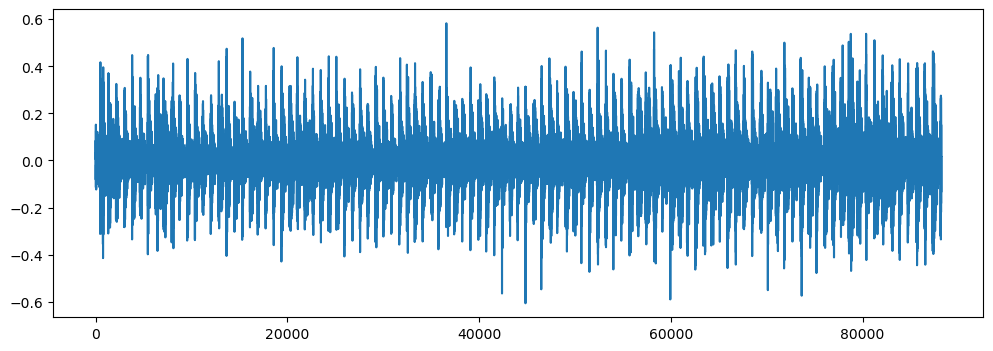

In [18]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [19]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [20]:
wave_audio

array([[ 1394,  1520],
       [ 3899, -1223],
       [ 5903, -1959],
       ...,
       [ -745, -2453],
       [-2529, -6471],
       [-4692, -9085]], dtype=int16)

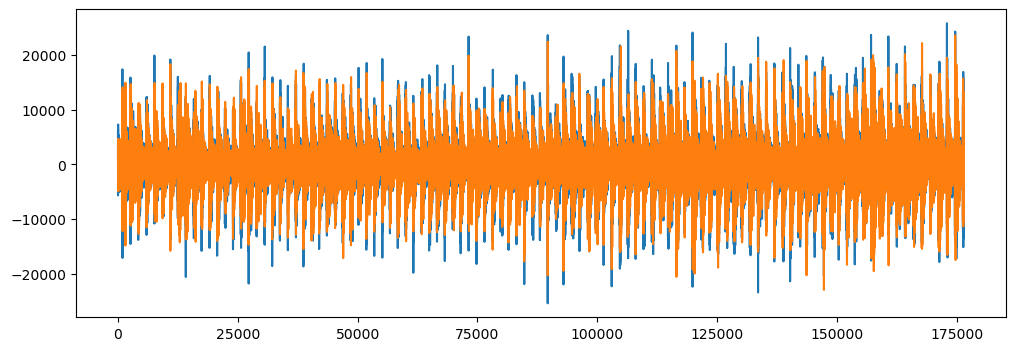

In [21]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [22]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [23]:
mfccs

array([[-1.5092682e+02, -9.4745010e+01, -9.4064171e+01, ...,
        -6.9872948e+01, -6.3823700e+01, -9.5124527e+01],
       [-1.8413183e+01, -2.7391176e+01, -2.9376225e+01, ...,
        -2.3300632e+01, -2.1239670e+01, -1.5106522e+01],
       [ 8.8267784e+00,  9.2896175e+00,  1.0320013e+01, ...,
        -1.0593405e-01,  6.5622945e+00,  1.0185417e+01],
       ...,
       [-5.8102689e+00, -1.3562740e+01, -1.2232961e+01, ...,
        -6.1945081e+00, -6.0173717e+00, -6.9742355e+00],
       [-5.6133580e+00, -3.3198974e+00, -7.5901880e+00, ...,
        -5.5168581e+00,  8.6716270e-01,  3.2682312e-01],
       [-1.4406011e+00, -2.3629767e-01,  2.0120320e+00, ...,
        -1.2419236e+00,  1.2112869e+00,  3.1697803e+00]], dtype=float32)

In [24]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/Users/shivaan/Desktop/UrbanSound8K/audio/'
metadata=pd.read_csv('/Users/shivaan/Desktop/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [25]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [26]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [05:09, 16.63it/s]/Users/shivaan/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [10:28, 19.51it/s]/Users/shivaan/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/shivaan/anaconda3/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8662it [10:51, 17.00it/s]/var/folders/hv/8659wt496f76jv0bz8f0fpj40000gn/T/ipykernel_48348/3073033249.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/Users/shivaan/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in libros

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shivaan/Desktop/UrbanSound8K/audio/fold9/98859-7-2-5.wav'

In [27]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [28]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [29]:
X.shape

(8662, 40)

In [30]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'jackhammer', 'jackhammer', 'jackhammer'], dtype='<U16')

In [31]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [32]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [33]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
X_train

array([[-1.44202774e+02,  6.91962509e+01, -3.49557915e+01, ...,
         2.72867298e+00, -2.25263715e+00,  3.16847706e+00],
       [-2.04920639e+02,  1.10430305e+02, -5.35578651e+01, ...,
         6.05373859e-01, -3.49171662e+00,  8.32723558e-01],
       [-2.69226868e+02,  1.74996986e+01,  3.46591415e+01, ...,
         1.07494378e+00, -1.32300949e+00,  3.99036378e-01],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490884e-01,  7.11009026e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651175e+00]], dtype=float32)

In [35]:
X_train.shape

(6929, 40)

In [36]:
X_test.shape

(1733, 40)

In [37]:
y_train.shape

(6929, 10)

In [38]:
y_test.shape

(1733, 10)

In [39]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [41]:
### No of classes
num_labels=y.shape[1]

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                6

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                6

In [44]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [45]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
216/217 [============================>.] - ETA: 0s - loss: 2.0196 - accuracy: 0.2393
Epoch 1: val_loss improved from inf to 1.74188, saving model to saved_models/audio_classification.hdf5
217/217 [==============================] - 11s 48ms/step - loss: 2.0193 - accuracy: 0.2396 - val_loss: 1.7419 - val_accuracy: 0.3826
Epoch 2/100
  3/217 [..............................] - ETA: 10s - loss: 1.9416 - accuracy: 0.2812

/Users/shivaan/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


216/217 [============================>.] - ETA: 0s - loss: 1.6981 - accuracy: 0.3970
Epoch 2: val_loss improved from 1.74188 to 1.59511, saving model to saved_models/audio_classification.hdf5
217/217 [==============================] - 11s 50ms/step - loss: 1.6978 - accuracy: 0.3970 - val_loss: 1.5951 - val_accuracy: 0.4195
Epoch 3/100
216/217 [============================>.] - ETA: 0s - loss: 1.4681 - accuracy: 0.4829
Epoch 3: val_loss improved from 1.59511 to 1.30733, saving model to saved_models/audio_classification.hdf5
217/217 [==============================] - 11s 49ms/step - loss: 1.4679 - accuracy: 0.4835 - val_loss: 1.3073 - val_accuracy: 0.5413
Epoch 4/100
217/217 [==============================] - ETA: 0s - loss: 1.2962 - accuracy: 0.5445
Epoch 4: val_loss improved from 1.30733 to 1.13109, saving model to saved_models/audio_classification.hdf5
217/217 [==============================] - 10s 48ms/step - loss: 1.2962 - accuracy: 0.5445 - val_loss: 1.1311 - val_accuracy: 0.6215
E

Epoch 29/100
217/217 [==============================] - ETA: 0s - loss: 0.1841 - accuracy: 0.9372
Epoch 29: val_loss did not improve from 0.56477
217/217 [==============================] - 11s 53ms/step - loss: 0.1841 - accuracy: 0.9372 - val_loss: 0.6018 - val_accuracy: 0.8552
Epoch 30/100
217/217 [==============================] - ETA: 0s - loss: 0.1619 - accuracy: 0.9486
Epoch 30: val_loss did not improve from 0.56477
217/217 [==============================] - 11s 51ms/step - loss: 0.1619 - accuracy: 0.9486 - val_loss: 0.6305 - val_accuracy: 0.8529
Epoch 31/100
217/217 [==============================] - ETA: 0s - loss: 0.1687 - accuracy: 0.9446
Epoch 31: val_loss did not improve from 0.56477
217/217 [==============================] - 12s 54ms/step - loss: 0.1687 - accuracy: 0.9446 - val_loss: 0.6020 - val_accuracy: 0.8696
Epoch 32/100
217/217 [==============================] - ETA: 0s - loss: 0.1496 - accuracy: 0.9537
Epoch 32: val_loss did not improve from 0.56477
217/217 [========

217/217 [==============================] - 14s 66ms/step - loss: 0.0503 - accuracy: 0.9860 - val_loss: 0.6836 - val_accuracy: 0.8765
Epoch 88/100
216/217 [============================>.] - ETA: 0s - loss: 0.0485 - accuracy: 0.9860
Epoch 88: val_loss did not improve from 0.56026
217/217 [==============================] - 13s 58ms/step - loss: 0.0484 - accuracy: 0.9860 - val_loss: 0.6049 - val_accuracy: 0.8852
Epoch 89/100
217/217 [==============================] - ETA: 0s - loss: 0.0286 - accuracy: 0.9915
Epoch 89: val_loss did not improve from 0.56026
217/217 [==============================] - 13s 58ms/step - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.7651 - val_accuracy: 0.8759
Epoch 90/100
216/217 [============================>.] - ETA: 0s - loss: 0.0508 - accuracy: 0.9857
Epoch 90: val_loss did not improve from 0.56026
217/217 [==============================] - 11s 50ms/step - loss: 0.0514 - accuracy: 0.9854 - val_loss: 0.7239 - val_accuracy: 0.8673
Epoch 91/100
216/217 [========

In [46]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8661280870437622


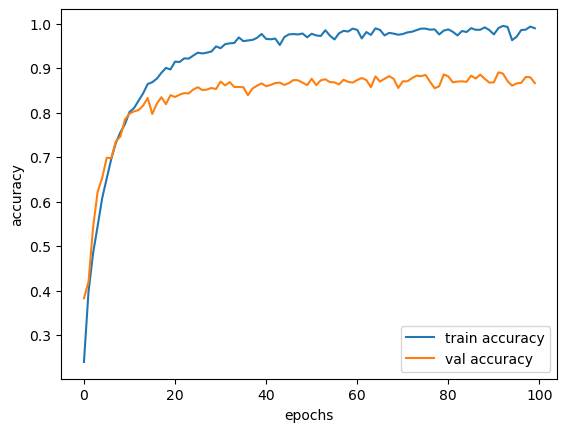

In [47]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [48]:
filename = "/Users/shivaan/Desktop/98859-7-2-5.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict class probabilities
predicted_probabilities = model.predict(mfccs_scaled_features)

# Get the index of the class with the highest probability
predicted_label_index = np.argmax(predicted_probabilities)

# Map the index to the actual class label using labelencoder
prediction_class = labelencoder.inverse_transform([predicted_label_index])

print("Predicted class:", prediction_class)


1/1 [==============================] - 0s 311ms/step
Predicted class: ['jackhammer']


In [49]:
model.save("speech_emotion_urban_lstm_test_acc86.h5")

/Users/shivaan/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
